## Results Analysis

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
user_names_small = ['U8170', 'U3277', 'U8840', 'U7311', 'U1467', 'U1789', 'U8168', 'U1581', 'U7004', 'U9763']
user_names_moderate = ['U5254', 'U9407', 'U1592', 'U1723', 'U1106', 'U3406', 'U342', 'U1653', 
                'U20', 'U250', 'U1450', 'U1164', 'U86']
user_names_most_active = ['U12', 'U13', 'U24', 'U78', 'U207', 'U293', 'U453', 'U679', 'U1289', 'U1480']
loss_file_cols=['day', 'num_events', 'loss', 'red_event']

In [3]:
def load_loss_data(user_name, loadmax = True):
    """
    """
    loss_type = 'max'
    if not loadmax:
        loss_type = 'diff'
        
    loss_file = '../data/users_losses/{}_losses_{}.txt'.format(user_name, loss_type)
    # check if the file exist
    if not os.path.exists(loss_file):
        raise Exception("File: '{}' doesn't exist".format(loss_file))

    return pd.read_csv(loss_file, header=None, names=loss_file_cols)



def process_data(loss_days):
    """
        process loss_days for user and return a list of red_events dataframe
    """
    count = 0
    results = []
    for day, group in loss_days:
        count +=1
        g1 = pd.DataFrame(group)
        g1.reset_index(drop=True, inplace=True)
    #     print('g1:\n', g1.head())

        num_events = g1['num_events'].unique()[0]
        g1 = g1.drop(['num_events'], axis=1)


        # calc the percentile of the entries in the group.
        percentile = [round(1 - x/num_events, 4) for x in g1.index.values]
        percent_s = pd.Series(percentile)
        g1['percentile'] = percent_s.values

        # filter on red_events
        red_events = g1[g1['red_event'] == 1]
        if not red_events.empty:
#             print('day:', day, '- num_events:', num_events)
#             print('red_events:\n', red_events)
            results.append((num_events, red_events))
    #     if count > 3:
    #         break
    return results

### Process users and display the red_events percentile in their days
We'll not process 'user_names_small' since they have very few events, and usual review of activities should detect any anomalies. Our testing show that we still have the red_events having higher percentile in the day

##### Here we process the files tagged with"max"

In [4]:
user_names = user_names_most_active + user_names_moderate + user_names_small
# user_names = user_names_small

group_results = []

for u in user_names:
    try:
        losses = load_loss_data(u)
        loss_days = losses.groupby(['day'])
        red_events = process_data(loss_days)
        print('======================')
        print('User: {}'.format(u))
        for num_events, anomalies in red_events:
            print('num_events:', num_events)
            print('anomalies:', anomalies)
            group_results.append(anomalies)
    except Exception as error:
        print('======================')
        print('Caught an error: ' + repr(error))

#     break

Caught an error: Exception("File: '../data/users_losses/U12_losses_max.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U13_losses_max.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U24_losses_max.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U78_losses_max.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U207_losses_max.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U293_losses_max.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U453_losses_max.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U679_losses_max.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U1289_losses_max.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U1480_losses_max.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U5254_

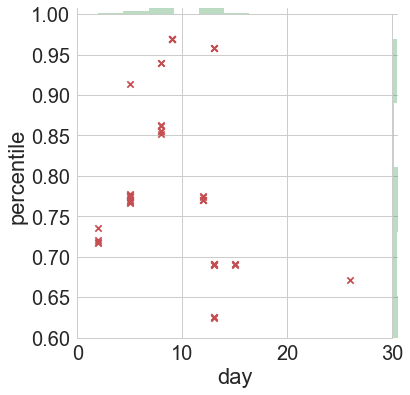

In [5]:
# Plot results

all_res = pd.concat(group_results)

# plt.figure(figsize=(12,8))
sns.set(style ="whitegrid", color_codes=True)
sns.set_context("notebook", font_scale=2)
grid = sns.JointGrid(x = 'day', y = 'percentile', data = all_res, space=0, ratio=50, xlim=(0, 30), ylim=(0.6, 1))
grid.plot_joint(plt.scatter, color="r", s=40, marker="x")
# grid.plot_marginals(sns.rugplot, height=1, color="g")
grid.plot_marginals(sns.distplot, kde=False, color="g")
plt.show()
plt.close()

##### Here we process the files tagged with"diff" 

In [6]:
user_names = user_names_most_active + user_names_moderate
# user_names = user_names_small

group_results = []

for u in user_names:
    try:
        losses = load_loss_data(u, False)
        loss_days = losses.groupby(['day'])
        red_events = process_data(loss_days)
        print('======================')
        print('User: {}'.format(u))
        for num_events, anomalies in red_events:
            print('num_events:', num_events)
            print('anomalies:', anomalies)
            group_results.append(anomalies)
    except Exception as error:
        print('======================')
        print('Caught an error: ' + repr(error))



Caught an error: Exception("File: '../data/users_losses/U12_losses_diff.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U13_losses_diff.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U24_losses_diff.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U78_losses_diff.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U207_losses_diff.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U293_losses_diff.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U453_losses_diff.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U679_losses_diff.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U1289_losses_diff.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_losses/U1480_losses_diff.txt' doesn't exist",)
Caught an error: Exception("File: '../data/users_los